# **Refatoração dos dados**

In [338]:
# Importação da biblioteca pandas e matplotlib
import pandas as pd  
import matplotlib.pyplot as plt 

# Leitura do arquivo googleplaystore.CSV
dataset = pd.read_csv('googleplaystore.csv')

#Covertendo a coluna Reviews para number
dataset['Reviews'] = pd.to_numeric(dataset['Reviews'], errors='coerce')

#Colocando em menusculo todos os carcateres da coluna de App
dataset['App'] = dataset['App'].str.lower()

# Remover linhas duplicatas mantendo o maior valor de 'Reviews'
dataset = dataset.sort_values('Reviews', ascending=False).drop_duplicates(subset=['App'], keep='first')

# Remoção de caracteres não numéricos da coluna 'Installs'
dataset['Installs'] = dataset['Installs'].str.replace(r'\D', '', regex=True)

# Convertendo para int a colunas Installs, convertendo valores inválidos em NaN e removendo esses valores
dataset['Installs'] = pd.to_numeric(dataset['Installs'], errors='coerce')
dataset['Installs'] = dataset['Installs'].astype(int)

#Convertendo a colina Price para float
dataset['Price'] = dataset['Price'].str.replace('$', '').astype(float)

#Retirando o caracter '_' das linhas de Category
dataset['Category'] = dataset['Category'].str.replace('_', ' ')

display(dataset)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,facebook,SOCIAL,4.1,78158306,Varies with device,1000000000,Free,0.00,Teen,Social,"August 3, 2018",Varies with device,Varies with device
381,whatsapp messenger,COMMUNICATION,4.4,69119316,Varies with device,1000000000,Free,0.00,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
2604,instagram,SOCIAL,4.5,66577446,Varies with device,1000000000,Free,0.00,Teen,Social,"July 31, 2018",Varies with device,Varies with device
382,messenger – text and video chat for free,COMMUNICATION,4.0,56646578,Varies with device,1000000000,Free,0.00,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
1879,clash of clans,GAME,4.6,44893888,98M,100000000,Free,0.00,Everyone 10+,Strategy,"July 15, 2018",10.322.16,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5023,dashboard ae,AUTO AND VEHICLES,NaN,0,13M,10,Free,0.00,Everyone,Auto & Vehicles,"May 16, 2018",1255162018,6.0 and up
6917,bw ultra,PRODUCTIVITY,NaN,0,24M,10,Free,0.00,Everyone,Productivity,"July 3, 2018",1.0,4.0 and up
6918,bw-ivms,PRODUCTIVITY,NaN,0,17M,100,Free,0.00,Everyone,Productivity,"July 26, 2018",12.0.18071400,4.1 and up
5029,ae manager,TOOLS,NaN,0,4.0M,100,Free,0.00,Everyone,Tools,"June 15, 2015",1.0.0,4.0.3 and up


# **Top 5 Aplicativos Mais Instalados na Google Play Store**
#### Critério de desenpate foi o número de reviews

In [341]:
top_5_apps = dataset.sort_values(['Installs','Reviews'], ascending=False, inplace=False).head(5)

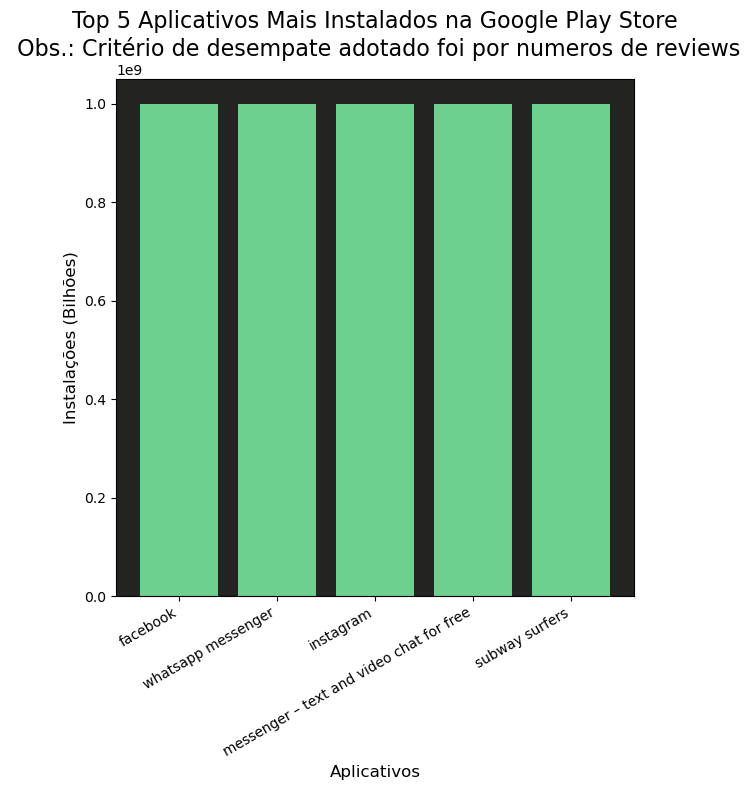

In [375]:
fig, ax = plt.subplots(figsize=(6, 8))

ax.set_facecolor('#232321')  

#Configurações de gráfico de barra
plt.bar(top_5_apps['App'], top_5_apps['Installs'], color='#6DD08E')
plt.xlabel('Aplicativos', fontsize=12)
plt.ylabel('Instalações (Bilhões)', fontsize=12)
plt.title('Top 5 Aplicativos Mais Instalados na Google Play Store\n Obs.: Critério de desempate adotado foi por numeros de reviews', fontsize=16)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()

# Exibição do gráfico
plt.show()

# **Frequência de aplicativos por categoria**

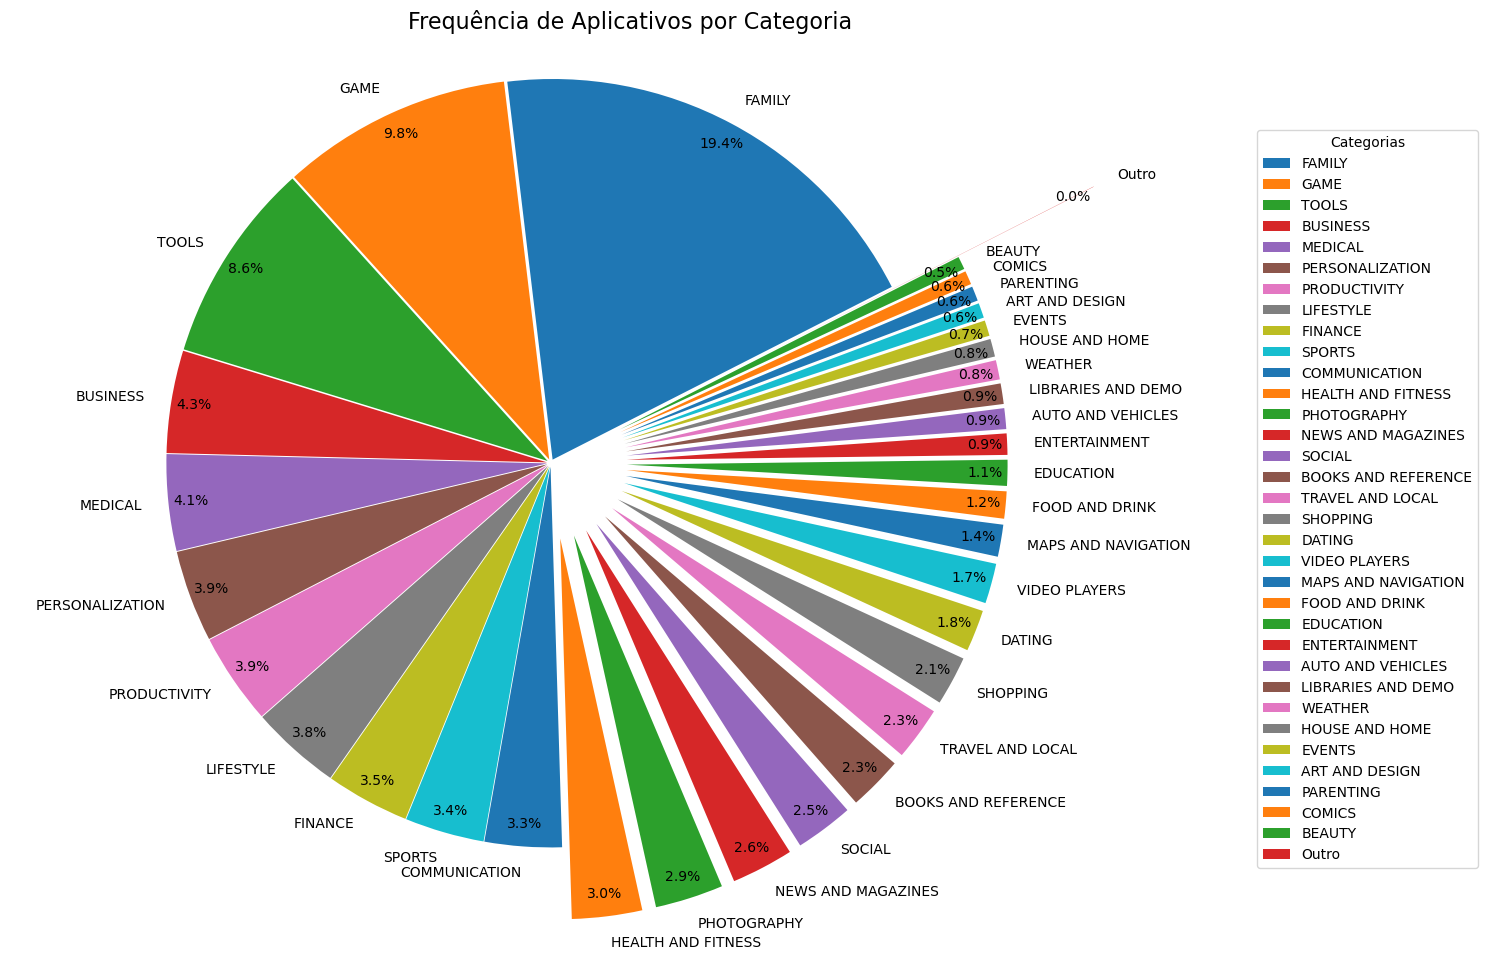

In [346]:
# Contando a frequencia de cada categoria
frequency_apps_by_category = dataset['Category'].value_counts()

#Adicionando explode diferentes para quantidades variadas para fins de legibilidade
explode = []
for count in frequency_apps_by_category:
    if count > 300:
        explode.append(0.01)
    elif count >50:
        explode.append(0.2)  
    else:
        explode.append(0.6)

#Configurando o gráfico de pizza
plt.figure(figsize=(16, 12))
plt.pie(
    frequency_apps_by_category,
    explode=explode,
    labels=frequency_apps_by_category.index,
    labeldistance= 1.07,
    autopct='%1.1f%%',
    pctdistance=0.94,
    startangle=27,
)
plt.title('Frequência de Aplicativos por Categoria',fontsize=16)
plt.axis('equal')

#Adicionando legenda e ajustando sua posição com loc e bbox_to_anchor
plt.legend( frequency_apps_by_category.index, title="Categorias", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

# **Aplicativo mais caro**

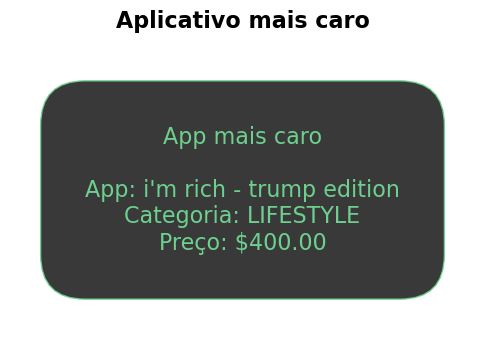

In [349]:
# Selecionando o aplicativo mais caro
most_expensive_app = dataset.loc[dataset['Price'].idxmax()]

# Configurando a figura
fig, ax = plt.subplots(figsize=(6, 4))

# Removendo os eixos e deixando só o card
ax.axis('off')

plt.title('Aplicativo mais caro', fontsize=16, weight='bold')

# Adicionando informações do app com maior preço
texto = (
    f"App mais caro\n\n"
    f"App: {most_expensive_app['App']}\n"
    f"Categoria: {most_expensive_app['Category']}\n"
    f"Preço: ${most_expensive_app['Price']:.2f}"
)


# Adicionando texto ao card e estilizando as cores, bordas e padding
plt.text(0.5, 0.5, texto, fontsize=16, color='#6DD08E', va='center', ha='center', bbox=dict(
    facecolor='#232323',
    edgecolor='#6DD08E',
    boxstyle='round, pad=2',
    alpha=0.9,
))


plt.show()

# **Contagem de apps com classificação Mature 17+**

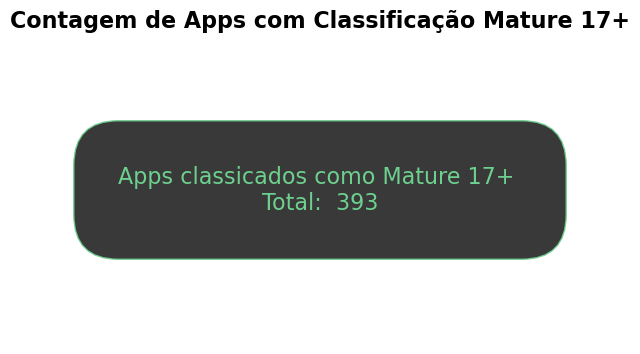

In [352]:
# Selecionando apenas apps com classificação 'Mature 17+'
mature_17_apps = dataset[dataset['Content Rating'] == 'Mature 17+']
# Realizando a contagem da quantidade de aplicativos com classificação 'Mature 17+'
count_mature_17_apps = mature_17_apps['Content Rating'].value_counts().get('Mature 17+', 0)

# Configurando a figura
fig, ax = plt.subplots(figsize=(6, 4))

# Removendo os eixos e deixando só o card
ax.axis('off')

# Adicionando título
plt.title('Contagem de Apps com Classificação Mature 17+', fontsize=16, weight='bold')

# Adicionando informações da contagem dos apps com classificação 'Mature 17+'
texto = (
    f"Apps classicados como Mature 17+ \nTotal:  {count_mature_17_apps}"
)

# Adicionando texto ao card e estilizando as cores, bordas e padding
plt.text(0.5, 0.5, texto, fontsize=16, color='#6DD08E', va='center', ha='center', bbox=dict(
    facecolor='#232323',
    edgecolor='#6DD08E',
    boxstyle='round, pad=2',
    alpha=0.9,
))
plt.show()

# **Top 10 apps mais visualizados**

In [355]:
# Selecionando os 10 apps mais visualizados
top_10_apps_ranking = dataset.sort_values(['Reviews'], ascending=False, inplace=False).head(10)

# Criando um DataFrame apenas com as colunas 'App' e 'Reviews', e resetando a sua linha de ordem no dataFrame geral
top_10_apps_ranking = top_10_apps_ranking[['App', 'Reviews']].reset_index(drop=True)

# Criando a coluna de ranking: 1°, 2°, 3°...
ranking = [f"{i}°" for i in range(1, 11)]

# Adicionar a coluna de ranking ao DataFrame
top_10_apps_ranking.insert(0, 'Ranking', ranking)

# Estilizando o DataFrame para centralizar o conteúdo que vai ser exibido no display
top_10_apps_ranking = top_10_apps_ranking.style.set_table_styles(
    [{'selector': 'td', 'props': [('text-align', 'left')]},
     {'selector': 'th', 'props': [('text-align', 'left')]}]
).set_properties(**{'text-align': 'left'}).hide(axis='index')

# Exibindo os 10 apps
display(top_10_apps_ranking)

Ranking,App,Reviews
1°,facebook,78158306
2°,whatsapp messenger,69119316
3°,instagram,66577446
4°,messenger – text and video chat for free,56646578
5°,clash of clans,44893888
6°,clean master- space cleaner & antivirus,42916526
7°,subway surfers,27725352
8°,youtube,25655305
9°,"security master - antivirus, vpn, applock, booster",24900999
10°,clash royale,23136735


# **Top 5 Apps pagos com mais visualizações**

In [358]:
# Criando um dataFrame para armenar apenas os aplicativos pagos
paid_apps = dataset.loc[df['Type'] == 'Paid']

# Selecionando os 5 apps com mais visualizações
top_5_apps_paid = paid_apps.sort_values(['Reviews'], ascending=False, inplace=False).head(5)

# Selecionado apenas as colunas Apps, Reviews e Category
top_5_apps_paid = top_5_apps_paid[['App', 'Reviews', 'Category']].reset_index(drop=True)

# Criando a coluna de ranking com 1°, 2°, 3°...
ranking = [f"{i}°" for i in range(1, 6)]

# Adicionando a coluna de ranking ao DataFrame
top_5_apps_paid.insert(0, 'Ranking', ranking)

# Estilizando o DataFrame para centralizar o conteúdo
top_5_apps_paid = top_5_apps_paid.style.set_table_styles(
    [{'selector': 'td', 'props': [('text-align', 'left')]},
     {'selector': 'th', 'props': [('text-align', 'left')]}]
).set_properties(**{'text-align': 'left'}).hide(axis='index')

# Exibi o dataFrame
display(top_5_apps_paid)


Ranking,App,Reviews,Category
1°,minecraft,2376564,FAMILY
2°,hitman sniper,408292,GAME
3°,grand theft auto: san andreas,348962,GAME
4°,bloons td 5,190086,FAMILY
5°,where's my water?,188740,FAMILY


# **App pago com melhor avaliação e o mais instalado**

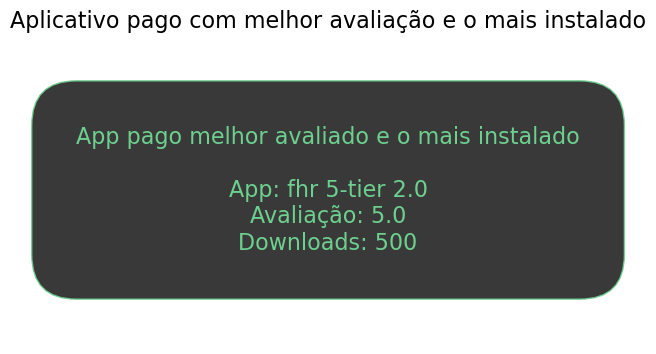

In [361]:
# Ordenando aplicativos pagos pelos valores das colunas 'Rating' e 'Installs' em ordem decrescente
best_rated_and_viewed_apps = paid_apps.sort_values(['Rating', 'Installs'], ascending=False, inplace=False)

# Selecionar apenas as colunas 'App', 'Installs' e 'Rating', retirando o índice e pegando apenas o primeiro
best_rated_and_viewed_apps = best_rated_and_viewed_apps[['App', 'Installs', 'Rating']].reset_index(drop=True).head(1)

# Criando a figura e os eixos
fig, ax = plt.subplots(figsize=(4,4))

# Removendo os eixos
ax.axis('off')

# Adicionando título
plt.title('Aplicativo pago com melhor avaliação e o mais instalado', fontsize=16)

# Adicionando informações do app com maior preço
texto = (
    f"App pago melhor avaliado e o mais instalado\n\n"
    f"App: {best_rated_and_viewed_apps.loc[0, 'App']}\n"
    f"Avaliação: {best_rated_and_viewed_apps.loc[0, 'Rating']}\n"
    f"Downloads: {best_rated_and_viewed_apps.loc[0, 'Installs']:,}"
)

# Adicionando texto ao card e estilizando as cores, bordas e padding
plt.text(0.5, 0.5, texto, fontsize=16, color='#6DD08E', va='center', ha='center', bbox=dict(
    facecolor='#232323',
    edgecolor='#6DD08E',
    boxstyle='round, pad=2',
    alpha=0.9,
))

plt.show()



# **Grafico dispersão: Quantidade de preços de apps pagos**

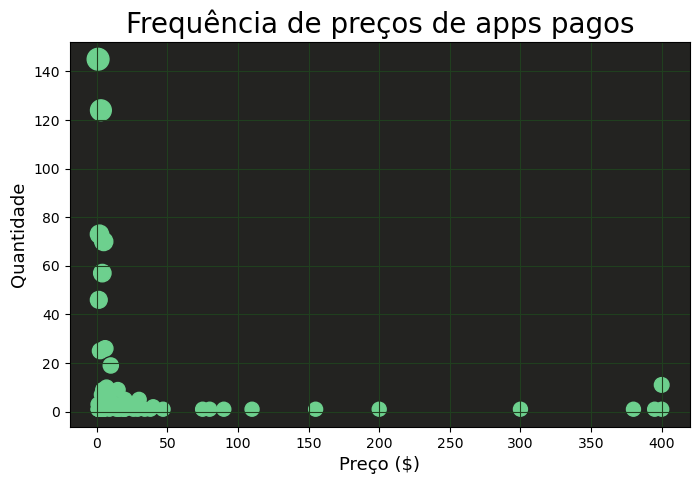

In [364]:
# Realizando a soma das quantidades de preços de apps pagos
price_frequency = paid_apps['Price'].value_counts()

# Criando uma array para mudar o tamanho dos pontos que aparecem no gráfico de acordo a sua quantidade
point_size = []
for count in price_frequency:
        point_size.append(count+100)

# Criando a figura, os eixos e colocando uma cor de fundo
fig, ax = plt.subplots(figsize=(8, 5))
ax.set_facecolor('#232321')  

# Adicionando títulos, rótulos, grid e customizando as cores de fundo
plt.title('Frequência de preços de apps pagos', fontsize=20)
plt.xlabel('Preço ($)', fontsize=13)
plt.ylabel('Quantidade', fontsize=13)
plt.grid(True, color='#203f1f')

# Criando gráfico dispersão
plt.scatter(price_frequency.index, price_frequency, s=point_size , color='#6DD08E')
plt.show()

# **Gráfico de linhas: número de últimas atualizações por Mês e Ano**

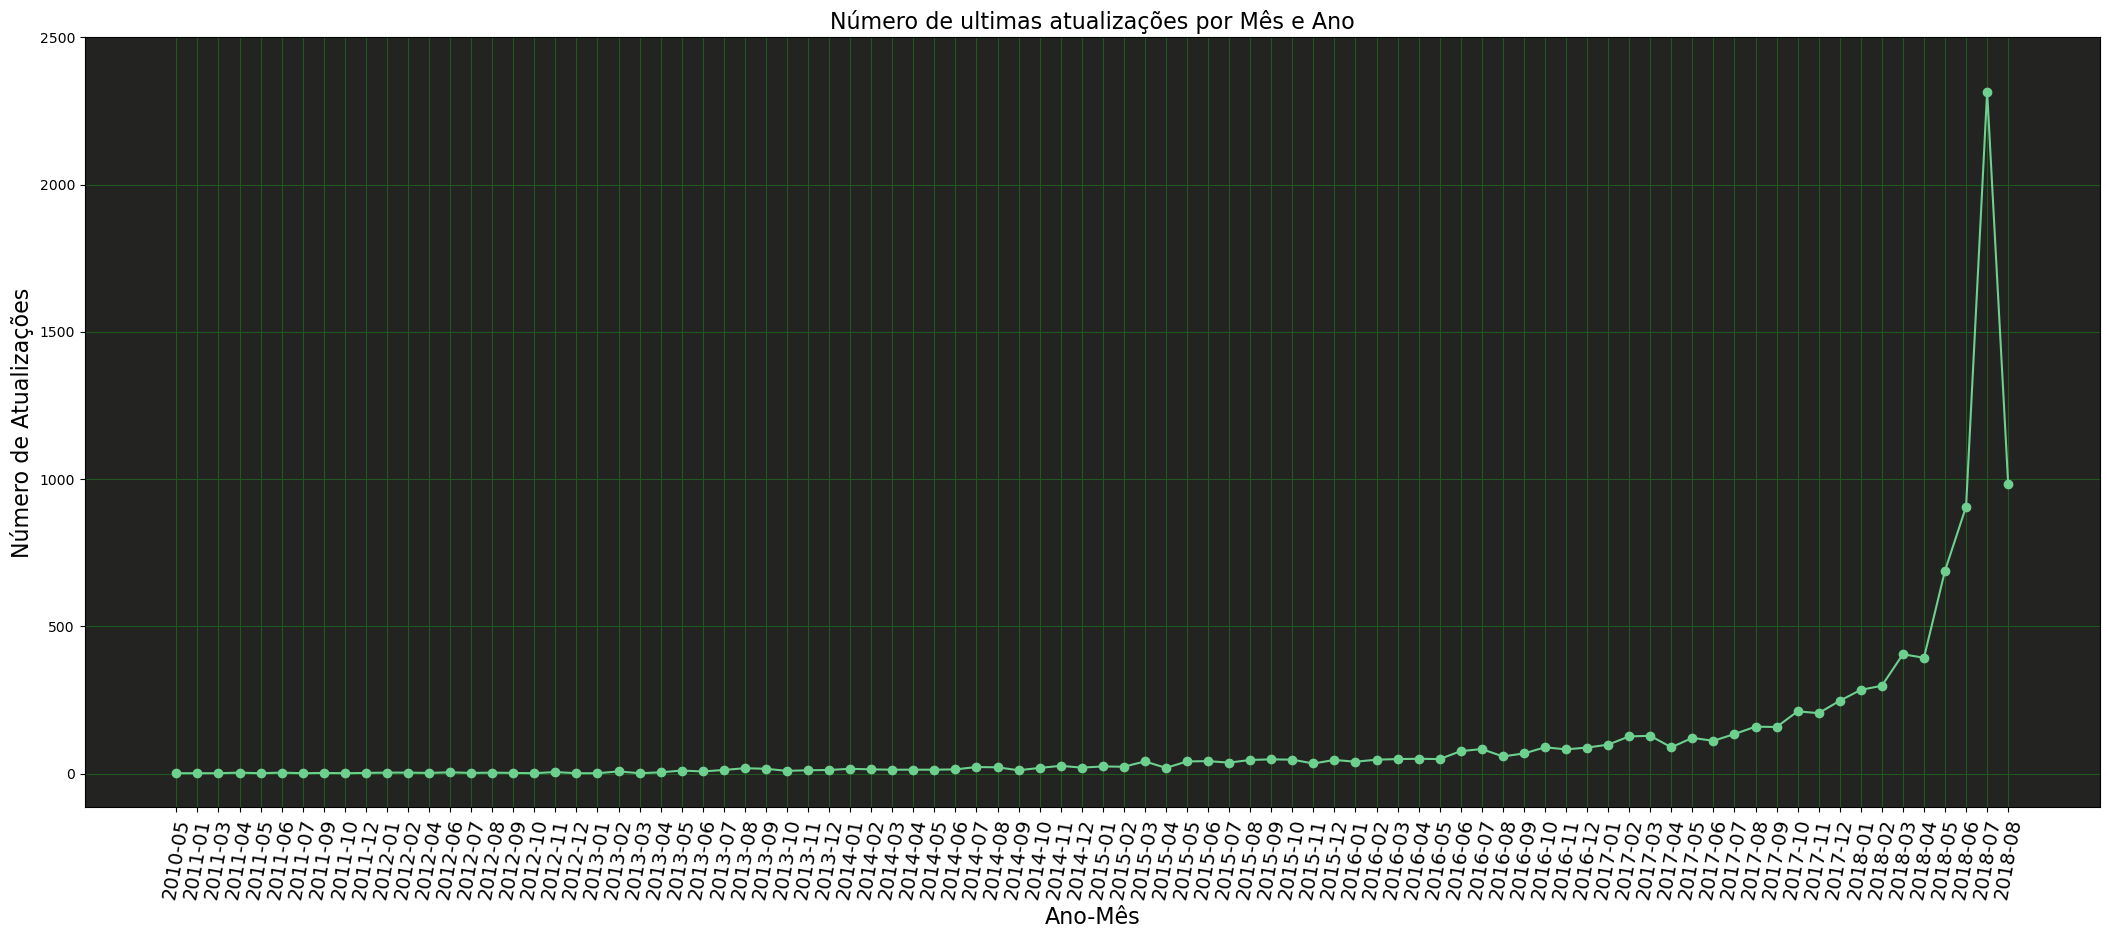

In [367]:
#Conversão da coluna 'Last Update' para o tipo date
dataset['Last Updated'] = pd.to_datetime(dataset['Last Updated'], errors='coerce')

# Criando coluna com apenas ano de ultima atualização
dataset['Last Updated Year'] = dataset['Last Updated'].dt.year

# Criando coluna com apenas mes de ultima atualização
dataset['Last Updated Month'] = dataset['Last Updated'].dt.month

# Agrupando os dados por ano e mes e fazendo a conta de quantos aplicativos aparecem e adicionando a um dataFRame
month_and_year_grouped = dataset.groupby(['Last Updated Year', 'Last Updated Month']).size().reset_index(name='Counts')

#Criando a coluna de mes e ano no dataFrame
month_and_year_grouped['YearMonth'] = month_and_year_grouped['Last Updated Year'].astype(str) + '-' + grouped['Last Updated Month'].astype(str).str.zfill(2)

#Criando figura, gráfico de linha, titulos e rotulos e suas estilizações para ficar mais legível
fig, ax = plt.subplots(figsize=(26, 10))
ax.set_facecolor('#232321')  
plt.plot(month_and_year_grouped['YearMonth'], month_and_year_grouped['Counts'], marker='o', color='#6DD08E', linestyle='-')
plt.title('Número de ultimas atualizações por Mês e Ano', fontsize=16)
plt.xlabel('Ano-Mês', fontsize=16)
plt.ylabel('Número de Atualizações',fontsize=16)
plt.grid(True, color='#20581f')
plt.ylim(top = 2500)
plt.xticks(rotation=80, fontsize= 14)
plt.show()

# **Referências**:
- https://matplotlib.org/stable/
- https://pt.stackoverflow.com/